In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split

# Data Preprocessing

### Import dataset

In [8]:
dataset = pd.read_csv('../../datasets/regression/Polynomial_Regression/Position_Salaries.csv')

In [9]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Let us analyse the dataset first.

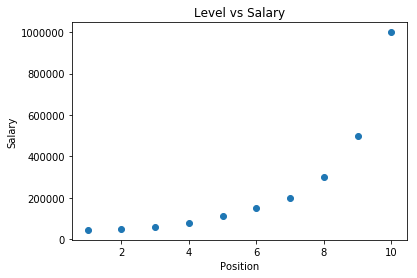

In [15]:
plt.scatter(dataset['Level'], dataset['Salary'])
plt.title('Level vs Salary')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

Suppose that there is an employee with current level as Country Manager (level 5) for the last 2 years, while the normal duration to get promoted is 4 years. His salary should be between salary level 5 and 6. But how much? 

### Determine the feature and dependent variable

Features should be considered as matrix, not as vector

In [20]:
X = dataset.iloc[:,1:2].values  # X as matrix instead of vector
Y = dataset.iloc[:,2].values

### Split dataset into training and test sets

The dataset we have only contain small information (10 rows), so it doesn't really make sense to split it into training and test sets because there is not enough information to train the model in one set.

Secondly, we need a very accurate prediction. In order to make it as accurate as possible, we need to access the maximum information available (use all data as training set)

### Fitting linear regression to the dataset

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Fitting polynomial regression to the dataset

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly_reg = PolynomialFeatures(degree=2)

we need to fit X to the model and transform it to polynomial

In [27]:
X_poly = poly_reg.fit_transform(X)

In [28]:
X_poly

array([[   1.,    1.,    1.],
       [   1.,    2.,    4.],
       [   1.,    3.,    9.],
       [   1.,    4.,   16.],
       [   1.,    5.,   25.],
       [   1.,    6.,   36.],
       [   1.,    7.,   49.],
       [   1.,    8.,   64.],
       [   1.,    9.,   81.],
       [   1.,   10.,  100.]])

The first column above is the constant b0 for polynomial regression equation

### Create second linear regression model that includes polynomial above

In [29]:
lin_reg2 = LinearRegression()

In [31]:
lin_reg2.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Visualizing the linear regression results

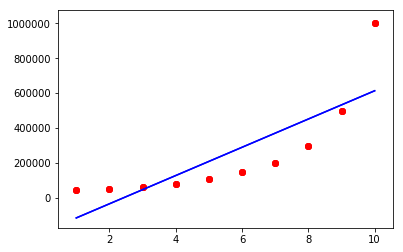

In [35]:
plt.scatter(X, Y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.show()

### Visualizing the polynomial regression results

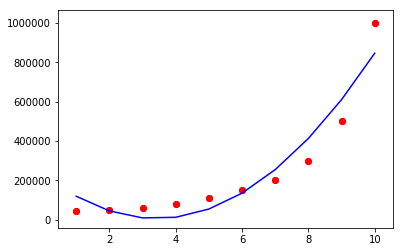

In [38]:
plt.scatter(X, Y, color='red')
plt.plot(X, lin_reg2.predict(X_poly), color='blue')
plt.show()

### Improving the polynomial model

To improve the prediction, let use different degree.

In [39]:
poly_reg_degree_3 = PolynomialFeatures(degree=3)

In [40]:
X_poly_degree_3 = poly_reg_degree_3.fit_transform(X)

In [41]:
lin_reg_deg_3 = LinearRegression()
lin_reg_deg_3.fit(X_poly_degree_3, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

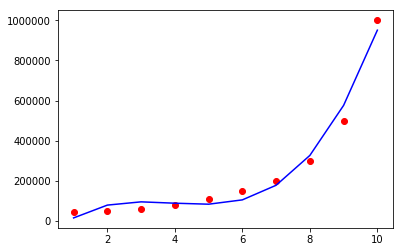

In [42]:
plt.scatter(X, Y, color='red')
plt.plot(X, lin_reg_deg_3.predict(X_poly_degree_3), color='blue')
plt.show()

### Degree 4

Let's go even further.. 
Go with degree 4

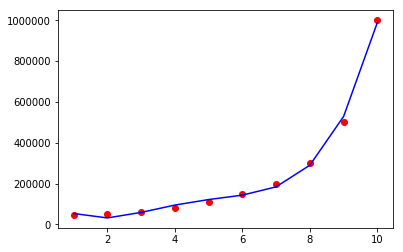

In [43]:
poly_reg_degree_4 = PolynomialFeatures(degree=4)
X_poly_degree_4 = poly_reg_degree_4.fit_transform(X)

lin_reg_deg_4 = LinearRegression()
lin_reg_deg_4.fit(X_poly_degree_4, Y)

plt.scatter(X, Y, color='red')
plt.plot(X, lin_reg_deg_4.predict(X_poly_degree_4), color='blue')
plt.show()

### Degree 5


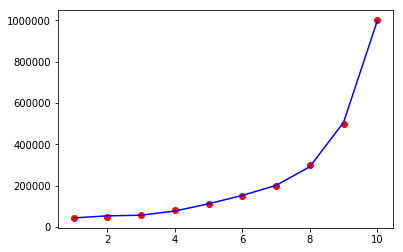

In [44]:
poly_reg_degree_5 = PolynomialFeatures(degree=5)
X_poly_degree_5 = poly_reg_degree_5.fit_transform(X)

lin_reg_deg_5 = LinearRegression()
lin_reg_deg_5.fit(X_poly_degree_5, Y)

plt.scatter(X, Y, color='red')
plt.plot(X, lin_reg_deg_5.predict(X_poly_degree_5), color='blue')
plt.show()

## Conclusion

Back to our initial question, what is the estimated salary for one with current level as Country Manager with 2-year experience?

In [46]:
lin_reg_deg_5.predict(poly_reg_degree_5.fit_transform(6.5))

array([ 174878.07765172])